In [242]:
import collections
import matplotlib.pyplot as plt
import numpy as np

In [338]:
def word_plot (num, words_dict, label, xlabel, ylabel, fmt, scale):
    fig = plt.figure(num)
    figsize = (40/2.54,21/2.54)
    dataX = [key for key,value in sorted(words_dict.items())]
    dataY = [value for key,value in sorted(words_dict.items())]
    plt.xticks(np.arange(min(words_dict.keys()), max(words_dict.keys())+1, 2.))
    plt.plot(dataX,dataY, fmt, label=label)
    plt.yscale(scale)
    #plt.axis([0,35,0.5,50000])
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.legend(fontsize=18, shadow=True)
    plt.grid(True)
    fig.set_size_inches(figsize)

In [107]:
def clean(input_list):
    """
    Removing doubles, make lowercase.
    Input: full path to words list
    Output: clean list of all words
    """
    return sorted(list(set([word.strip().lower() for word in open(input_list,'r', encoding='UTF-8')])))

In [108]:
def signature(word):
    """
    Function takes word, sorts by letters and join togeser in alphabetical order
    Input: one word
    Output: all sorted letters from word
    """
    return ''.join(sorted(word))

In [109]:
def anagram_fast(word,input_dict):
    """
    Function returns all words that have the same letters ("signature")
    Input: one considered word and dictionary {signature: [words]} to look in.
    Output: list of words
    """
    return input_dict[signature(word)]

In [110]:
def words_bylen(input_list):
    """
    Function sorts words by length
    Input: clean list of words 
    Output: dictionary {length of word: [all words of this length]} 
    """
    output_dict = collections.defaultdict(list)
    for word in input_list:
        output_dict[len(word)].append(word)
    return output_dict

In [111]:
def words_bysig(input_list):
    """
    Function sorts words by "signature" (alphabetical set of letters the word consist of)
    Input: clean list of words 
    Output: dictionary {"signature": [all words of this length]} 
    """
    output_dict = collections.defaultdict(list)
    for word in input_list:
        output_dict[signature(word)].append(word)
    return output_dict

In [112]:
def wordsN_bylen(input_dict):
    """
    Function calculates N of words of specified length
    Input: dictionary  {length of word: [all words of this length]} 
    Output: dictionary {length of word: number of words of such length}
    """
    output_dict = {}
    for key in input_dict.keys():
        output_dict[key] = len(input_dict[key])
    return output_dict

In [361]:
def words_percent_bylen(input_dict, lang):
    """
    Function calculates % of words of specified length from overall length of word list
    Input: dictionary  {length of word: [all words of this length]}, list of all dicts length
    Output: dictionary {length of word: % of words of such length}
    """
    output_dict = {}
    for key in input_dict.keys():
        output_dict[key] = len(input_dict[key])*100/list_length[str(lang)]
    return output_dict

In [352]:
def anagrams_all(input_list):
    """
    Function calculates all anagrams and sorts it by word length
    Input: dictionary  {length of word: [all words of this length]} 
    Output: dictionary {length of word: number of anagrams of such length}
    """
    cleandict = clean(input_list)
    word_len = words_bylen(cleandict)
    word_sig = words_bysig(cleandict)
    
    anagrams = {}
    for key, words in word_len.items():
        anagrams[key] = sum(len(anagram_fast(word, word_sig))-1 for word in words if len(anagram_fast(word, word_sig)) > 1)/2
    return anagrams

In [365]:
def anagrams_percent_all(input_list, lang):
    """
    Function calculates all anagrams (in % of all words of specified length) and sorts it by word length
    Input: dictionary  {length of word: [all words of this length]} 
    Output: dictionary {length of word: % of anagrams of such length}
    """
    cleandict = clean(input_list)
    word_len = words_bylen(cleandict)
    word_sig = words_bysig(cleandict)
    
    anagrams = {}
    for key, words in word_len.items():
        anagrams[key] = (sum(len(anagram_fast(word, word_sig))-1 
                             for word in words if len(anagram_fast(word, word_sig)) > 1)/2)*100/list_length[str(lang)]
    return anagrams

## Step-by-step processing of words lists for different languages 

In [131]:
files = {'en': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/words',
             'ua': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/ua.txt',
             'ru': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/ru.txt',
             'ru_sm': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/ru1.txt',
             'fr_sm': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/fr1.txt',
             'fr': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/fr.txt',
             'de': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/de.txt',
             'en_sm': 'c:/Users/Андрей/Desktop/Anagrams in different languages project/Word lists/english3.txt'}

__Convert into lowercase, remove doubles, find length of words lists__

In [134]:
cleanlist = {}
for key in files.keys():
    cleanlist[key] = clean(files[key])

In [156]:
[print(key, cleanlist[key][1:10]) for key in cleanlist.keys()]

en ['aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic']
ua ["аб'юдикація", "аб'юрація", 'абажур', 'абажурний', 'абажурчик', 'абаз', 'абазія', 'абак', 'абаксіальний']
ru ['абажурный', 'абаз', 'абазинец', 'абазинка', 'абак', 'абака', 'абакан', 'абаканский', 'абакум']
ru_sm ['аба', 'абажур', 'абажурный', 'абаз', 'абазин', 'абазинец', 'абазинка', 'абазинский', 'абак']
fr_sm ['a', 'ab', 'abaissa', 'abaissai', 'abaissaient', 'abaissais', 'abaissait', 'abaissant', 'abaissas']
fr ['a-t-elle', 'a-t-il', 'a-t-on', 'abaissa', 'abaissable', 'abaissables', 'abaissai', 'abaissaient', 'abaissais']
de ['a', 'aachen', 'aal', 'aale', 'aalen', 'aals', 'aargau', 'aargaus', 'aas']
en_sm ['aa', 'aaa', 'aachen', 'aardvark', 'aardvarks', 'aardwolf', 'aardwolves', 'aarhus', 'aaron']


[None, None, None, None, None, None, None, None]

In [138]:
list_length = {}
for key in cleanlist.keys():
    list_length[key] = len(cleanlist[key])

In [389]:
textbox='\n'
for key, value in list_length.items():
    textbox = textbox + (str(key) + ': ' + str(value) + '\n')

__Sort words by its length:__

- make lists of words of specified length

- find number of that words for each length

- additionally recalculate into % from all words from list (to eliminate different length of words lists for different languages

In [386]:
words_bylen_dict = {}
for key in cleanlist.keys():
    words_bylen_dict[key] = words_bylen(cleanlist[key])

[print(key, words_bylen_dict[key][2][1:10]) for key in words_bylen_dict.keys()]

en ['ab', 'ad', 'ae', 'ah', 'ai', 'ak', 'al', 'am', 'an']
ua ['ар', 'ас', 'ом', 'ум', 'щі', 'юс', 'ют', 'яв', 'яз']
ru ['аж', 'аз', 'ан', 'ао', 'ар', 'ас', 'ах', 'ба', 'бы']
ru_sm ['аж', 'аз', 'аи', 'ай', 'ан', 'ар', 'ас', 'ау', 'ах']
fr_sm ['ad', 'ah', 'ai', 'an', 'as', 'au', 'bi', 'bu', 'ca']
fr ['ai', 'an', 'as', 'au', 'aï', 'bu', 'cc', 'ce', 'cf']
de ['ad', 'ag', 'ah', 'ai', 'am', 'an', 'ar', 'as', 'au']
en_sm ['ab', 'ad', 'ae', 'ah', 'ai', 'al', 'am', 'an', 'ao']


[None, None, None, None, None, None, None, None]

In [169]:
wordsN_bylen_dict = {}
for key in cleanlist.keys():
    wordsN_bylen_dict[key] = wordsN_bylen(words_bylen_dict[key])

In [362]:
words_percent_dict = {}

for lang in list_length.keys():
    words_percent_dict[lang] = words_percent_bylen(words_bylen_dict[lang], lang)

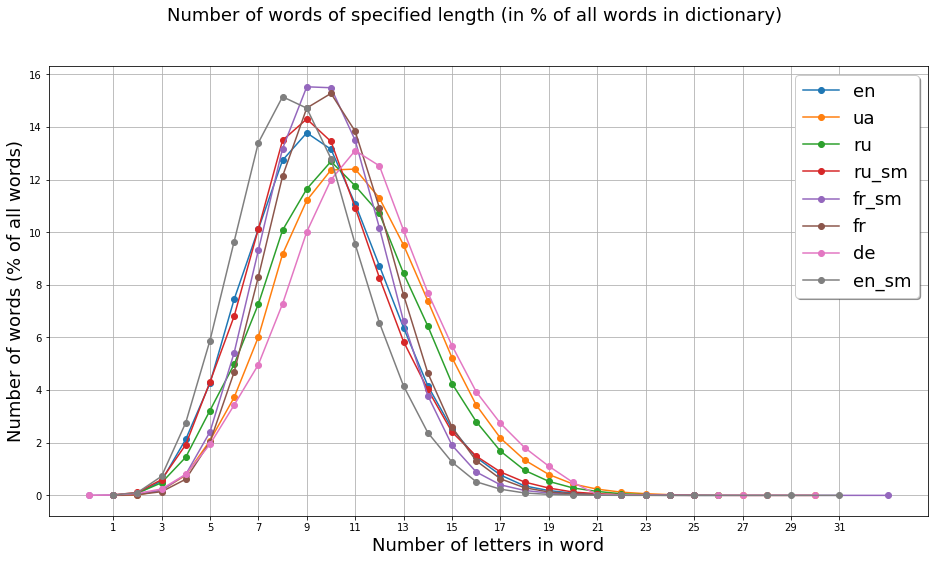

In [399]:
[word_plot(1, words_percent_dict[key], key, 'Number of letters in word','Number of words (% of all words)',
           'o-','linear') for key in words_percent_dict.keys()]
plt.suptitle('Number of words of specified length (in % of all words in dictionary)', fontsize=18)
plt.savefig('words_percent.png', dpi=72)
#plt.show()

## Find anagrams for each list of words of given length

__In absolute numbers:__

In [367]:
anagrams_dict = {}
for key in files.keys():
    anagrams_dict[key]=anagrams_all(files[key])

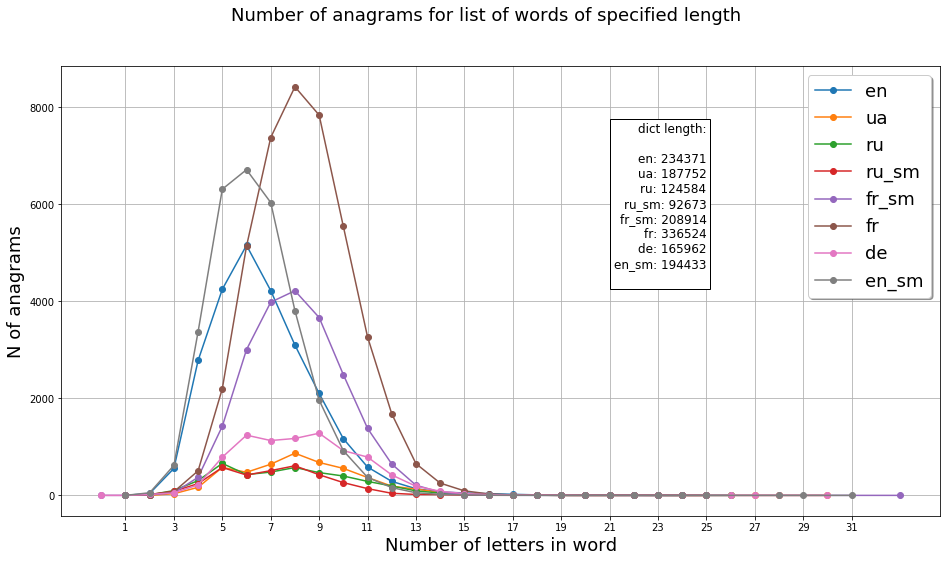

In [398]:
[word_plot(1, anagrams_dict[key], key, 'Number of letters in word','N of anagrams','o-','linear') 
 for key in anagrams_dict.keys()]
plt.text(25,6000, 'dict length:\n'+textbox, horizontalalignment='right', verticalalignment='center', fontsize=12, 
         bbox=dict(boxstyle="square",facecolor='white'))
plt.suptitle('Number of anagrams for list of words of specified length', fontsize=18)
plt.savefig('anagrams.png', dpi=72)
#plt.show()

__In % from all words of given length__

In [370]:
anagrams_percent_dict = {}
for lang in files.keys():
    anagrams_percent_dict[lang]=anagrams_percent_all(files[lang],lang)

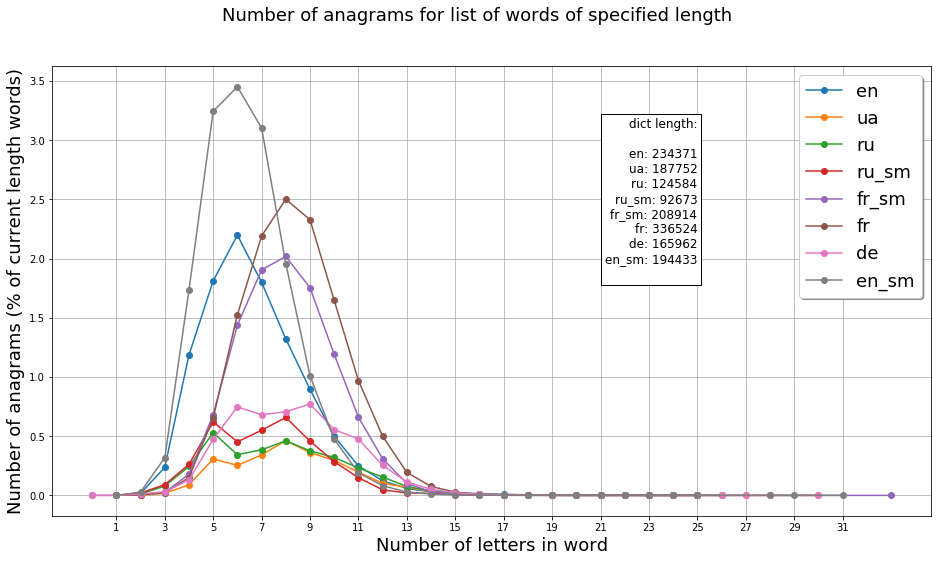

In [397]:
[word_plot(1, anagrams_percent_dict[key], key, 
           'Number of letters in word','Number of anagrams (% of current length words)','o-','linear') 
 for key in anagrams_percent_dict.keys()]
plt.text(25,2.5, 'dict length:\n'+textbox, horizontalalignment='right', verticalalignment='center', fontsize=12, 
         bbox=dict(boxstyle="square",facecolor='white'))
plt.suptitle('Number of anagrams for list of words of specified length', fontsize=18)
plt.savefig('anagrams_percent.png', dpi=72)
#plt.show()
